<a href="https://colab.research.google.com/github/saharnazyp/TelemaicVehicle/blob/main/TelemaicVehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Problem Statement
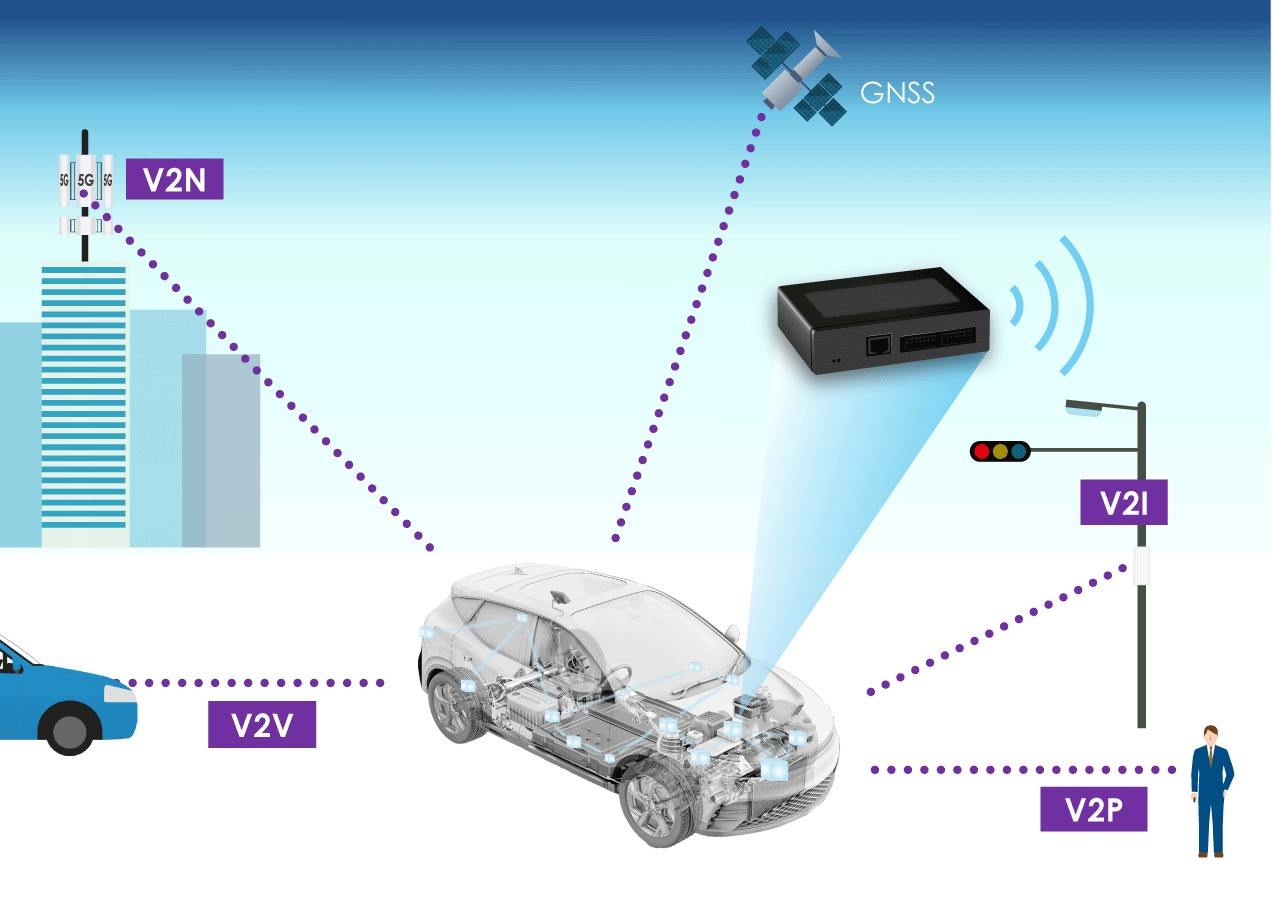
This project aims to detect vehicle status (normal/faulty) based on telematics data. We'll walk through a full data science workflow including EDA, preprocessing, modeling, and evaluation.

In [87]:

!pip install lazypredict


You should consider upgrading via the 'C:\Users\Simin y\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install jenkspy

  Using cached jenkspy-0.4.1-cp39-cp39-win_amd64.whl (224 kB)


You should consider upgrading via the 'C:\Users\Simin y\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install seaborn


     -------------------------------------- 294.9/294.9 KB 1.0 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Simin y\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install pandas matplotlib  numpy scikit-learn tensorflow keras


     ------------------------------------ 375.7/375.7 MB 564.7 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 1.0 MB/s eta 0:00:00
     ------------------------------------ 434.6/434.6 KB 799.2 kB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 496.6 kB/s eta 0:00:00
     -------------------------------------- 135.6/135.6 KB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 209.4/209.4 KB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 1.5 MB/s eta 0:00:00
     -------------------------------------- 243.

You should consider upgrading via the 'C:\Users\Simin y\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [83]:
!pip install ipywidgets


     ------------------------------------ 139.8/139.8 KB 830.6 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 216.6/216.6 KB 3.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Simin y\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [164]:
! "C:\Users\Simin y\AppData\Local\Programs\Python\Python39\python.exe" -m pip install gradio --target="C:\Users\Simin y\AppData\Local\Programs\Python\Python39\Lib\site-packages"


  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached huggingface_hub-0.31.4-py3-none-any.whl.metadata (13 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.11.10-py3-none-win_amd64.whl.metadata (26 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached typer-0.15.4-py3-none-any.whl.metadata (15 kB)
  Using cached uvicorn-0.34.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached starlette-0.46.2-py3-none-any.whl.metadata (6.2 kB)
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
    -----------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow-skinny 2.22.0 requires packaging<25, but you have packaging 25.0 which is incompatible.


In [198]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, models

from sklearn.model_selection import GridSearchCV

from keras import models
import keras.models as keras_models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense, Input

from sklearn.utils import class_weight

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import jenkspy

import lazypredict.Supervised
from lazypredict.Supervised import LazyClassifier

import tqdm



from lightgbm import LGBMClassifier

import joblib

import gradio as gr


# 📥 Data Loading

In [14]:
base_path = r"D:\DeepLearning\TelematicVehicle\Data"

os.listdir(base_path)

['allcars.csv', 'v2.csv']

In [33]:

file_path = os.path.join(base_path, 'allcars.csv')
df_allcars = pd.read_csv(file_path, low_memory=False)

file_v2 = os.path.join(base_path, 'v2.csv')
df_v2 = pd.read_csv(file_v2, low_memory=False)

def convert_numeric_columns(df, exclude=[]):
    for col in df.columns:
        if col not in exclude:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df_allcars= convert_numeric_columns(df_allcars , exclude=['tripID', 'deviceID', 'accData', 'timeStamp'])
df_v2 = convert_numeric_columns(df_v2, exclude=['tripID', 'deviceID', 'accData', 'timeStamp'])


In [16]:
dtype_dict = {
    'tripID': str,
    'deviceID': str,
    'accData': str,
    'gps_speed': float,
    'battery': float,
    'cTemp': float,
    'dtc': float,
    'eLoad': float,
    'iat': float,
    'imap': float,
    'kpl': float,
    'maf': float,
    'rpm': float,
    'speed': float,
    'tAdv': float,
    'tPos': float
}





In [17]:
for col in df_allcars.columns:
    if col != 'tripID':
        df_allcars[col] = pd.to_numeric(df_allcars[col], errors='coerce')


In [18]:
def inspect_dataframe(df, name):
    print(f"\n📄 Inspecting `{name}`")
    print("=" * (13 + len(name)))
    print(f"🔹 Shape: {df.shape}")
    print("🔹 Columns:", ", ".join(df.columns))
    print("🔹 Preview:")
    display(df.head())

inspect_dataframe(df_allcars, "allcars.csv")


inspect_dataframe(df_v2, "v2.csv")




📄 Inspecting `allcars.csv`
🔹 Shape: (7214695, 18)
🔹 Columns: Unnamed: 0, timeStamp, tripID, accData, gps_speed, battery, cTemp, dtc, eLoad, iat, imap, kpl, maf, rpm, speed, tAdv, tPos, deviceID
🔹 Preview:


Unnamed: 0  timeStamp  tripID  accData  gps_speed  battery  cTemp  dtc  \
0           0        NaN       0      NaN        2.2    14.48    NaN  NaN   
1           1        NaN       0      NaN        3.7    14.48    NaN  NaN   
2           2        NaN       0      NaN        3.9    14.54    NaN  NaN   
3           3        NaN       0      NaN        3.9    14.56    NaN  NaN   
4           4        NaN       0      NaN        4.7    14.48    NaN  NaN   

       eLoad  iat  imap  kpl  maf     rpm  speed  tAdv       tPos  deviceID  
0  44.313725  NaN   NaN  0.0  0.0   903.0    4.0   NaN  15.686275         1  
1  35.294118  NaN   NaN  0.0  0.0   938.0    6.0   NaN  15.294118         1  
2  29.411765  NaN   NaN  0.0  0.0  1044.5    7.0   NaN  14.901961         1  
3  53.725490  NaN   NaN  0.0  0.0  1102.0    7.0   NaN  17.647059         1  
4  75.686275  NaN   NaN  0.0  0.0  1626.5   10.0   NaN  23.529412         1


📄 Inspecting `v2.csv`
🔹 Shape: (3120272, 17)
🔹 Columns: tripID, deviceID, timeStamp, accData, gps_speed, battery, cTemp, dtc, eLoad, iat, imap, kpl, maf, rpm, speed, tAdv, tPos
🔹 Preview:


tripID deviceID            timeStamp  \
0      1      0.0  2017-12-22 18:43:05   
1      1      0.0  2017-12-22 18:43:06   
2      1      0.0  2017-12-22 18:43:07   
3      1      0.0  2017-12-22 18:43:08   
4      1      0.0  2017-12-22 18:43:09   

                                             accData  gps_speed  battery  \
0  10c0f8e00448fa18c80515d30000000000000000000000...    24.2612      0.0   
1  1138f8c804780a1ebdf718bcf919d10617c8e301b31017...    23.1500      0.0   
2  10f0f89804480612c30010c30714ce0520b7f41dbdf118...    18.7052      0.0   
3  10d0f84804480d15bd0210c9f822c80017caf81ccd0517...    16.4828      0.0   
4  1090f8c80480041dc9081cc50815c60511c60112c40514...    17.4088      0.0   

   cTemp  dtc    eLoad   iat  imap  kpl  maf      rpm  speed  tAdv  tPos  
0   66.0  0.0  28.6275  40.0  97.0  0.0  0.0  1010.75   23.0   0.0   0.0  
1   66.0  0.0  33.7255  40.0  98.0  0.0  0.0   815.50   21.0   0.0   0.0  
2   66.0  0.0  43.1373  40.0  98.0  0.0  0.0   862.25   17.0   0.0   0.0  
3   66.0  0.0  41.5686  40.0  97.0  0.0  0.0   817.00   17.0   0.0   0.0  
4   66.0  0.0  43.1373  40.0  97.0  0.0  0.0   804.25   15.0   0.0   0.0

In [19]:
df_v2.head()

tripID deviceID            timeStamp  \
0      1      0.0  2017-12-22 18:43:05   
1      1      0.0  2017-12-22 18:43:06   
2      1      0.0  2017-12-22 18:43:07   
3      1      0.0  2017-12-22 18:43:08   
4      1      0.0  2017-12-22 18:43:09   

                                             accData  gps_speed  battery  \
0  10c0f8e00448fa18c80515d30000000000000000000000...    24.2612      0.0   
1  1138f8c804780a1ebdf718bcf919d10617c8e301b31017...    23.1500      0.0   
2  10f0f89804480612c30010c30714ce0520b7f41dbdf118...    18.7052      0.0   
3  10d0f84804480d15bd0210c9f822c80017caf81ccd0517...    16.4828      0.0   
4  1090f8c80480041dc9081cc50815c60511c60112c40514...    17.4088      0.0   

   cTemp  dtc    eLoad   iat  imap  kpl  maf      rpm  speed  tAdv  tPos  
0   66.0  0.0  28.6275  40.0  97.0  0.0  0.0  1010.75   23.0   0.0   0.0  
1   66.0  0.0  33.7255  40.0  98.0  0.0  0.0   815.50   21.0   0.0   0.0  
2   66.0  0.0  43.1373  40.0  98.0  0.0  0.0   862.25   17.0   0.0   0.0  
3   66.0  0.0  41.5686  40.0  97.0  0.0  0.0   817.00   17.0   0.0   0.0  
4   66.0  0.0  43.1373  40.0  97.0  0.0  0.0   804.25   15.0   0.0   0.0

In [20]:
df_allcars.shape


(7214695, 18)

In [21]:
rows, columns = df_allcars.shape
print(f"Rows: {rows}, Columns: {columns}")


Rows: 7214695, Columns: 18


In [22]:
print(f"df_allcars shape: {df_allcars.shape}")
print(f"df_v2 shape: {df_v2.shape}")

df_allcars shape: (7214695, 18)
df_v2 shape: (3120272, 17)


# 🔍 EDA (Exploratory Data Analysis)

*Convert Data Types in df_v2*

In [23]:
df_allcars.info()
df_v2.info()
df_allcars.isnull().sum()
df_v2.isnull().sum()


# Columns that should be numeric (based on df_allcars)
numeric_cols = ['gps_speed', 'battery', 'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl',
                'maf', 'rpm', 'speed', 'tAdv', 'tPos']

# Convert to float, setting invalid entries to NaN
for col in numeric_cols:
    df_v2[col] = pd.to_numeric(df_v2[col], errors='coerce')

# Optionally convert tripID and deviceID as well
df_v2['tripID'] = pd.to_numeric(df_v2['tripID'], errors='coerce')
df_v2['deviceID'] = pd.to_numeric(df_v2['deviceID'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214695 entries, 0 to 7214694
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   timeStamp   float64
 2   tripID      int64  
 3   accData     float64
 4   gps_speed   float64
 5   battery     float64
 6   cTemp       float64
 7   dtc         float64
 8   eLoad       float64
 9   iat         float64
 10  imap        float64
 11  kpl         float64
 12  maf         float64
 13  rpm         float64
 14  speed       float64
 15  tAdv        float64
 16  tPos        float64
 17  deviceID    int64  
dtypes: float64(15), int64(3)
memory usage: 990.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120272 entries, 0 to 3120271
Data columns (total 17 columns):
 #   Column     Dtype  
---  ------     -----  
 0   tripID     object 
 1   deviceID   object 
 2   timeStamp  object 
 3   accData    object 
 4   gps_speed  float64
 5   battery    float64
 6   cTemp      float64
 7   

# Check for Missing Values

In [24]:
print("Missing values in df_allcars:")
print(df_allcars.isnull().sum())

print("\nMissing values in df_v2:")
print(df_v2.isnull().sum())


Missing values in df_allcars:
Unnamed: 0          0
timeStamp     7214695
tripID              0
accData       6954317
gps_speed     2112146
battery       2112146
cTemp         5115495
dtc           5115495
eLoad         2112146
iat           5115495
imap          5115495
kpl           2112146
maf           2112146
rpm           2112146
speed               0
tAdv          5115495
tPos          2112146
deviceID            0
dtype: int64

Missing values in df_v2:
tripID       32
deviceID     32
timeStamp     0
accData       0
gps_speed    32
battery      32
cTemp        32
dtc          32
eLoad        32
iat          32
imap         32
kpl          32
maf          32
rpm          32
speed        32
tAdv         32
tPos         32
dtype: int64


In [25]:

num_duplicated_records = df_allcars.duplicated().sum()
print(f"Number of duplicated records is: {num_duplicated_records}")
df_allcars.drop_duplicates(inplace=True)
num_duplicated_records_after = df_allcars.duplicated().sum()
print(f"Number of duplicated records after deletion is: {num_duplicated_records_after}")


Number of duplicated records is: 0
Number of duplicated records after deletion is: 0


In [26]:
df_allcars.max(numeric_only=True)


Unnamed: 0     9.692090e+05
timeStamp               NaN
tripID         1.081000e+03
accData       1.880060e+197
gps_speed      3.332000e+02
battery        2.550000e+02
cTemp          2.550000e+02
dtc            2.550000e+02
eLoad          2.550000e+02
iat            2.550000e+02
imap           2.550000e+02
kpl            2.336240e+04
maf            6.019000e+02
rpm            1.539150e+04
speed          4.486200e+02
tAdv           2.550000e+02
tPos           2.550000e+02
deviceID       5.300000e+01
dtype: float64

In [27]:
print(df_allcars['accData'].describe())
print(df_allcars['accData'].dtype)

count     2.603780e+05
mean     7.220503e+191
std                inf
min       0.000000e+00
25%       0.000000e+00
50%       0.000000e+00
75%       0.000000e+00
max      1.880060e+197
Name: accData, dtype: float64
float64


C:\Users\Simin y\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


**Basic Dataset Comparison**

In [28]:
# Check for unique trip IDs
print("Unique tripIDs in df_allcars:", df_allcars['tripID'].nunique())
print("Unique tripIDs in df_v2:", df_v2['tripID'].nunique())

# Time range check
print("Time range in df_allcars:", df_allcars['timeStamp'].min(), "to", df_allcars['timeStamp'].max())
print("Time range in df_v2:", df_v2['timeStamp'].min(), "to", df_v2['timeStamp'].max())


Unique tripIDs in df_allcars: 1082
Unique tripIDs in df_v2: 431
Time range in df_allcars: nan to nan
Time range in df_v2: 2017-11-18 16:23:30 to timeStamp


# Convert timeStamp to DateTime Format

In [29]:
df_allcars['timeStamp'] = pd.to_datetime(df_allcars['timeStamp'], errors='coerce')
df_v2['timeStamp'] = pd.to_datetime(df_v2['timeStamp'], errors='coerce')


# Initial EDA & Visualization

**Plot histogram**

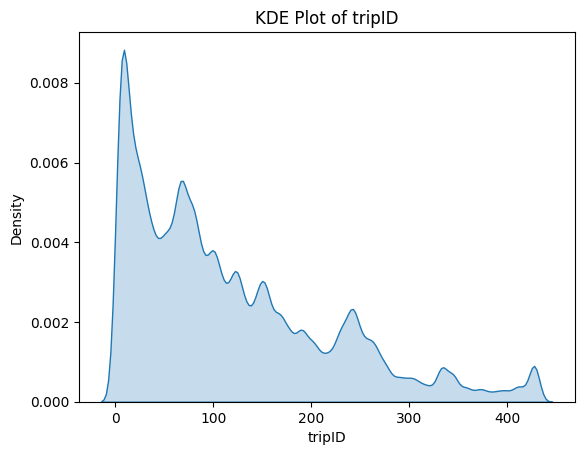

In [30]:
numeric_cols_v2 = df_v2.select_dtypes(include=['float64', 'int64']).columns.tolist()

sns.kdeplot(data=df_v2, x=numeric_cols_v2[0], fill=True)
plt.title(f'KDE Plot of {numeric_cols_v2[0]}')
plt.show()



In [31]:
numeric_cols_allcars = df_allcars.select_dtypes(include=['float64', 'int64']).columns.tolist()

sns.pairplot(df_allcars[numeric_cols_allcars])
plt.show()

In [38]:
print(df_allcars.columns)


Index(['Unnamed: 0', 'timeStamp', 'tripID', 'accData', 'gps_speed', 'battery',
       'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed',
       'tAdv', 'tPos', 'deviceID'],
      dtype='object')


In [46]:
sns.histplot(data=filtered_df, x='speed', bins=100, kde=True)
plt.title('Speed Distribution Histogram + KDE (Speed < 150)')
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.show()


In [48]:
filtered_df = df_allcars[df_allcars['rpm'] < 3000]

sns.kdeplot(data=filtered_df, x='rpm', fill=True)
plt.title('RPM Distribution - KDE Plot (rpm < 3000)')
plt.xlabel("RPM")
plt.ylabel("Density")
plt.show()



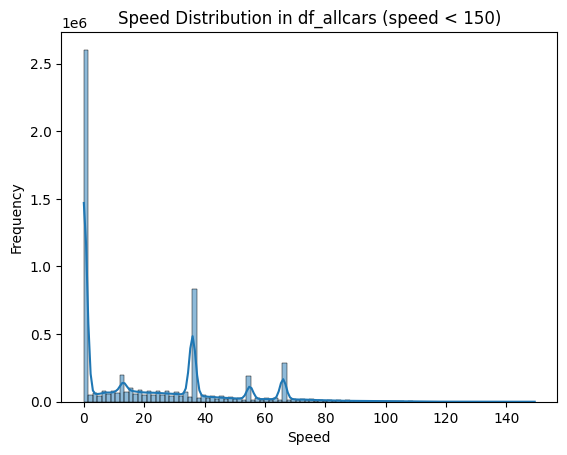

In [49]:
filtered_speed = df_allcars[df_allcars['speed'] < 150]['speed']

sns.histplot(filtered_speed, bins=100, kde=True)
plt.title("Speed Distribution in df_allcars (speed < 150)")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.show()


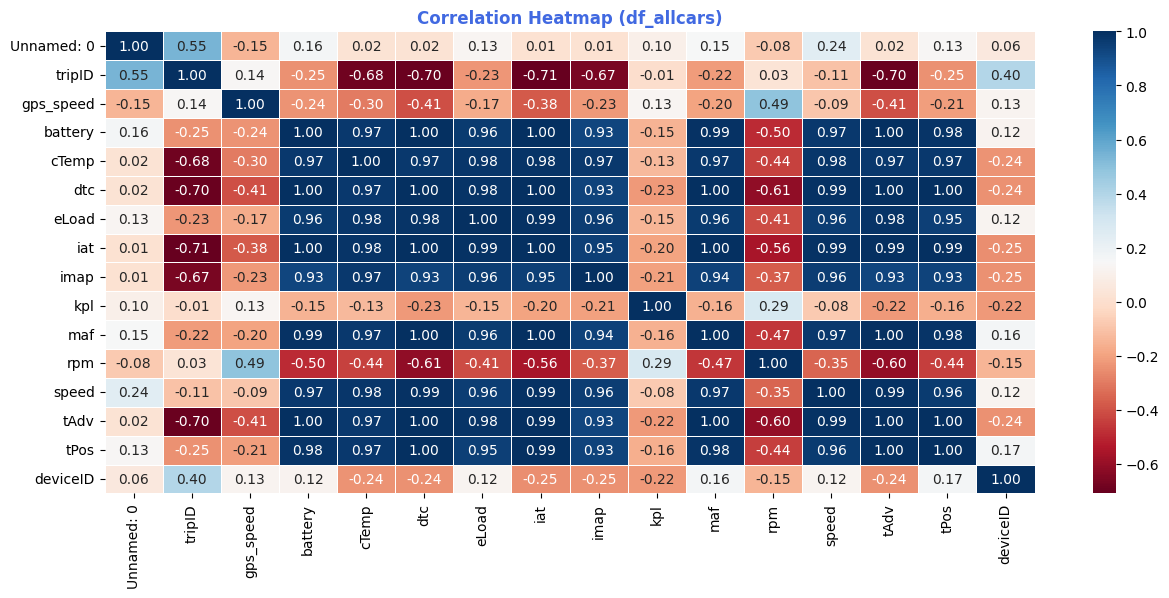

In [50]:
plt.figure(figsize=(15, 6))
dataplot = sns.heatmap(df_allcars.corr(numeric_only=True), cmap='RdBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (df_allcars)", color='royalblue', weight='bold')
plt.show()



In [53]:
Q1 = df_allcars['speed'].quantile(0.25)
Q3 = df_allcars['speed'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sns.boxplot(x=df_allcars[df_allcars['speed'] < 150]['speed'])
plt.title("Boxplot of Speed (speed < 150)")
plt.show()


In [54]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.boxplot(x=df_allcars['speed'])
plt.title("All Speed Data")


plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_df['speed'])
plt.title("Filtered Speed (Outliers Removed)")

plt.tight_layout()
plt.show()


Scatter Plot

In [55]:
sns.scatterplot(data=df_allcars, x='rpm', y='speed', alpha=0.3)
plt.title("RPM vs Speed")
plt.xlabel("RPM")
plt.ylabel("Speed")
plt.show()


## 🔍 Sample Prediction

Pairplot

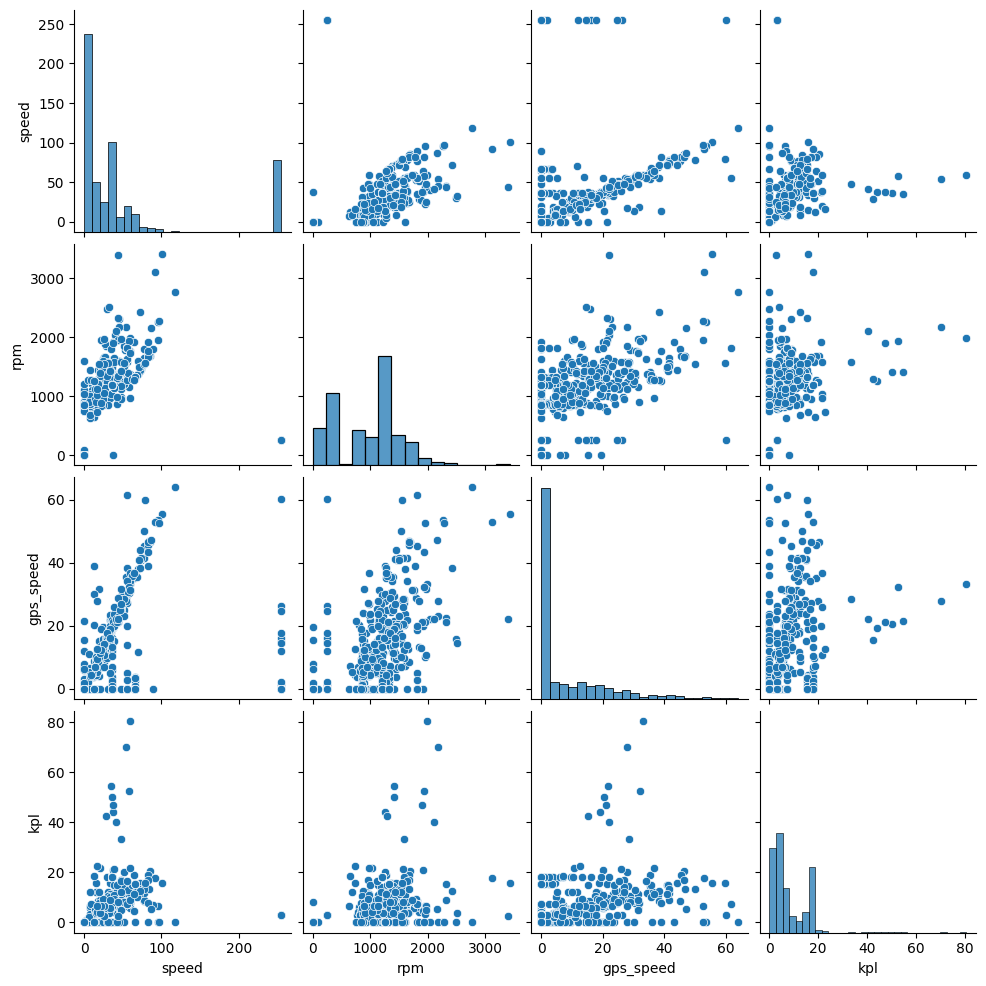

In [56]:
sample = df_allcars.sample(1000, random_state=42)
sns.pairplot(sample[['speed', 'rpm', 'gps_speed', 'kpl']])
plt.show()


# 🛠️ Preprocessing

Missing Values

**Calculate the cross-tabulation**

In [57]:
pd.crosstab(index=df_allcars['tripID'], columns=df_allcars['deviceID'])


deviceID    1    2      4      5     8     11    12   13    15      16  ...  \
tripID                                                                  ...   
0         1383  348    904  60948   198  2684  4403  431  1357  234403  ...   
1            1    5      6      1    11     4   983   20     9       0  ...   
2            3   10  27310    550  1193    10   712  139     5       0  ...   
3           43  652    604    883  1425   165    37  288     1       0  ...   
4           15  838     75   1385   257  1629     2  171     8       0  ...   
...        ...  ...    ...    ...   ...   ...   ...  ...   ...     ...  ...   
1077         0    0      0      0     0     0     0    0     0       0  ...   
1078         0    0      0      0     0     0     0    0     0       0  ...   
1079         0    0      0      0     0     0     0    0     0       0  ...   
1080         0    0      0      0     0     0     0    0     0       0  ...   
1081         0    0      0      0     0     0     0    0     0       0  ...   

deviceID    37    38    43    44    45     46    47     50   51    53  
tripID                                                                 
0          790  2624  3976  1032  2385  17669   780  36753  238  4658  
1            5   243     2     5    17      6     2     82   70    23  
2           20  2499    92  3281   298   1136   165     62  658   426  
3          415  1033   123   301   211    355  2038     32  667   577  
4         1361   252    56   147  1219    893   396     14  520   924  
...        ...   ...   ...   ...   ...    ...   ...    ...  ...   ...  
1077         0     0     0     0     0      0     0      0    0   165  
1078         0     0     0     0     0      0     0      0    0   581  
1079         0     0     0     0     0      0     0      0    0  1067  
1080         0     0     0     0     0      0     0      0    0   719  
1081         0     0     0     0     0      0     0      0    0  2055  

[1082 rows x 29 columns]

In [58]:
pd.crosstab(df_allcars['deviceID'], df_allcars['dtc'])


dtc        0.0     255.0
deviceID                
2         106460       0
12             0     216
16             0  234403
22             0   78013
23             0   10979
24             0   40139
43        203125     607
45        353440      19
46             0  600236
47         83784       0
50             0   40725
51             0     470
53        346495      89

In [59]:
pd.crosstab(df_allcars['deviceID'], df_allcars['dtc'], normalize='index') * 100


dtc            0.0         255.0
deviceID                        
2         100.000000    0.000000
12          0.000000  100.000000
16          0.000000  100.000000
22          0.000000  100.000000
23          0.000000  100.000000
24          0.000000  100.000000
43         99.702060    0.297940
45         99.994625    0.005375
46          0.000000  100.000000
47        100.000000    0.000000
50          0.000000  100.000000
51          0.000000  100.000000
53         99.974321    0.025679

Box Plot / Violin Plot for Battery by DeviceID

In [60]:

print(df_allcars.isna().sum())


Unnamed: 0          0
timeStamp           0
tripID              0
accData        158868
gps_speed     2112146
battery       2112146
cTemp         5115495
dtc           5115495
eLoad         2112146
iat           5115495
imap          5115495
kpl           2112146
maf           2112146
rpm           2112146
speed               0
tAdv          5115495
tPos          2112146
deviceID            0
dtype: int64


## 🛠️ Data Preprocessing

In [61]:
df_allcars = df_allcars.dropna()

In [62]:
df_allcars = df_allcars.fillna(0)
print((df_allcars == float('inf')).sum())
df_allcars = df_allcars.replace([float('inf'), -float('inf')], 0)

Unnamed: 0    0
timeStamp     0
tripID        0
accData       0
gps_speed     0
battery       0
cTemp         0
dtc           0
eLoad         0
iat           0
imap          0
kpl           0
maf           0
rpm           0
speed         0
tAdv          0
tPos          0
deviceID      0
dtype: int64


In [63]:
numeric_df = df_allcars.select_dtypes(include=[np.number])
cond_number = np.linalg.cond(numeric_df.corr())

print(f"Condition number: {cond_number}")
numeric_df = df_allcars.select_dtypes(include=[np.number])

matrix = numeric_df.corr()

matrix += np.eye(matrix.shape[0]) * 1e-5


print(matrix)

Condition number: 129257.67350557886
            Unnamed: 0    tripID  gps_speed   battery     cTemp       dtc  \
Unnamed: 0    1.000010  0.506980   0.002550  0.021248  0.020133  0.021965   
tripID        0.506980  1.000010   0.251964 -0.701187 -0.683212 -0.701134   
gps_speed     0.002550  0.251964   1.000010 -0.406435 -0.297176 -0.406800   
battery       0.021248 -0.701187  -0.406435  1.000010  0.968803  0.999615   
cTemp         0.020133 -0.683212  -0.297176  0.968803  1.000010  0.967758   
dtc           0.021965 -0.701134  -0.406800  0.999615  0.967758  1.000010   
eLoad         0.012575 -0.699346  -0.350597  0.983971  0.976381  0.983868   
iat           0.013338 -0.709029  -0.380745  0.995305  0.984952  0.995093   
imap          0.013339 -0.668496  -0.227687  0.930185  0.971937  0.933403   
kpl           0.007295  0.196153   0.402893 -0.212042 -0.131955 -0.226250   
maf           0.028617 -0.693159  -0.387866  0.998385  0.973125  0.998949   
rpm          -0.050856  0.380789   0.68

In [64]:
numeric_df = df_allcars.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


reduced_df = numeric_df.drop(columns=to_drop)

print("remove columns", to_drop)

remove columns ['cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'maf', 'speed', 'tAdv', 'tPos']


# 🔬Train and test

In [79]:

X = df_allcars.drop(columns=['speed', 'timeStamp', 'tripID', 'deviceID', 'accData'])

X = X.select_dtypes(include='number')


y = df_allcars['speed']



In [96]:
features = ['gps_speed', 'battery', 'cTemp', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv', 'tPos']
df['label'] = df['dtc'].apply(lambda x: 1 if x > 0 else 0)
X = df[features]

y = df['label']
print(df.columns.tolist())


['tripID', 'deviceID', 'timeStamp', 'accData', 'gps_speed', 'battery', 'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv', 'tPos', 'acceleration', 'angle_change', 'acceleration_squared', 'angle_change_squared', 'label']


In [103]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [104]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# **🚀 Model**

## 🤖 Model Building

In [105]:

lazypredict.Supervised.tqdm = tqdm.tqdm

In [111]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Simin y\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [120]:

value_counts = y.value_counts()
valid_classes = value_counts[value_counts >= 10].index
X_filtered = X[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]


In [121]:

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, stratify=y_filtered, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from lazypredict.Supervised import LazyClassifier
import lazypredict.Supervised
import tqdm
import pandas as pd

lazypredict.Supervised.notebook_tqdm = tqdm.tqdm

clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)


pd.set_option('display.max_rows', None)
print(models.sort_values("Accuracy", ascending=False))







  0%|                                                                                           | 0/32 [00:00<?, ?it/s]




  3%|██▌                                                                                | 1/32 [00:00<00:17,  1.76it/s]




  6%|█████▏                                                                             | 2/32 [00:00<00:11,  2.65it/s]




 12%|██████████▍                                                                        | 4/32 [00:01<00:05,  4.95it/s]




 25%|████████████████████▊                                                              | 8/32 [00:01<00:02, 10.67it/s]




 31%|█████████████████████████▋                                                        | 10/32 [00:01<00:02,  8.55it/s]




 38%|██████████████████████████████▊                                                   | 12/32 [00:01<00:02,  8.90it/s]




 44%|███████████████████████████████████▉                                              | 14/32 [00:09<00:22,  1.23s/it]




 50

[LightGBM] [Info] Number of positive: 5007, number of negative: 2992
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1590
[LightGBM] [Info] Number of data points in the train set: 7999, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625953 -> initscore=0.514895
[LightGBM] [Info] Start training from score 0.514895
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.98               0.98    None      0.98   
RandomForestClassifier             0.98               0.98    None      0.98   
LGBMClassifier                     0.98               0.98    None      0.98   
BaggingClassifier                  0.98               0.98    None      0.98   
AdaBoostClassifier             

In [122]:
print(models.head())


                        Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                   
ExtraTreesClassifier        0.98               0.98    None      0.98   
RandomForestClassifier      0.98               0.98    None      0.98   
LGBMClassifier              0.98               0.98    None      0.98   
BaggingClassifier           0.98               0.98    None      0.98   
AdaBoostClassifier          0.97               0.97    None      0.97   

                        Time Taken  
Model                               
ExtraTreesClassifier          0.33  
RandomForestClassifier        0.64  
LGBMClassifier                0.13  
BaggingClassifier             0.24  
AdaBoostClassifier            0.57  


In [123]:
print(predictions)


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.98               0.98    None      0.98   
RandomForestClassifier             0.98               0.98    None      0.98   
LGBMClassifier                     0.98               0.98    None      0.98   
BaggingClassifier                  0.98               0.98    None      0.98   
AdaBoostClassifier                 0.97               0.97    None      0.97   
DecisionTreeClassifier             0.97               0.97    None      0.97   
SGDClassifier                      0.97               0.97    None      0.97   
LabelPropagation                   0.97               0.97    None      0.97   
KNeighborsClassifier               0.97               0.97    None      0.97   
LabelSpreading                     0.97               0.97    None      0.97   
CalibratedClassifierCV             0.97 

In [167]:

model = LGBMClassifier()
model.fit(X_train_scaled, y_train)


[LightGBM] [Info] Number of positive: 5007, number of negative: 2992
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1590
[LightGBM] [Info] Number of data points in the train set: 7999, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625953 -> initscore=0.514895
[LightGBM] [Info] Start training from score 0.514895


LGBMClassifier()

In [168]:

joblib.dump(model, 'best_telematics_model.pkl')

['best_telematics_model.pkl']

In [173]:
def predict_driving_style(speed, rpm, battery, maf, tPos, *args) :
    input_array = np.array([[speed, rpm, battery, maf, tPos, *args]])
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    return prediction[0]

gr.Interface(
    fn=predict_driving_style,
    inputs=["number"] * 12,
    outputs="text",
    title="Telematics Driving Style Predictor"
).launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [169]:
sample_input = X_test_scaled[0].reshape(1, -1)
prediction = model.predict(sample_input)
print("Predicted Driving Style:", prediction[0])


Predicted Driving Style: normal


**⚡joblib**

In [174]:
joblib.dump(model, "telematics_model.pkl")

joblib.dump(scaler, "telematics_scaler.pkl")

['telematics_scaler.pkl']

 **✔ Feature Importances**

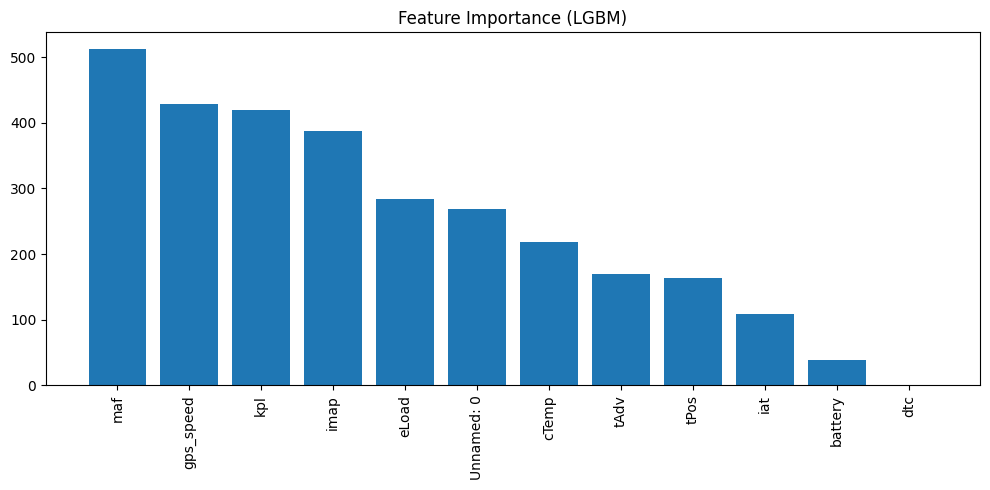

In [176]:
feature_names = X.columns


importances = model.feature_importances_
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importance (LGBM)")
plt.tight_layout()
plt.show()

**🚗confusion matrix & classification report**

              precision    recall  f1-score   support

        calm       0.97      0.98      0.97       748
      normal       0.99      0.98      0.98      1252

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



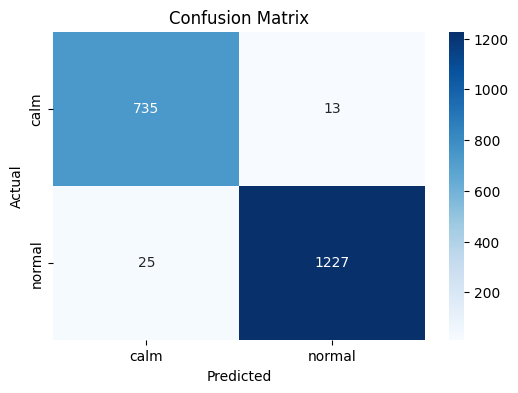

In [177]:
y_pred = model.predict(X_test_scaled)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**💪 Gradio**

In [178]:
odel = joblib.load("telematics_model.pkl")
scaler = joblib.load("telematics_scaler.pkl")


def predict(speed, rpm, battery, cTemp, eLoad, iat, imap, maf, tAdv, tPos):
    input_data = np.array([[speed, rpm, battery, cTemp, eLoad, iat, imap, maf, tAdv, tPos]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return prediction[0]


gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Speed"),
        gr.Number(label="RPM"),
        gr.Number(label="Battery"),
        gr.Number(label="Coolant Temp"),
        gr.Number(label="Engine Load"),
        gr.Number(label="Intake Air Temp"),
        gr.Number(label="Intake MAP"),
        gr.Number(label="MAF"),
        gr.Number(label="Timing Advance"),
        gr.Number(label="Throttle Position")
    ],
    outputs="text",
    title="Driving Style Classifier (Calm / Normal / Aggressive)"
).launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


# 🧠 Modeling with Pipeline

In [182]:
model_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [0.85, 0.90, 0.87]
})

display(model_df.sort_values("Accuracy", ascending=False))


Model  Accuracy
1        Random Forest      0.90
2                  SVM      0.87
0  Logistic Regression      0.85

In [95]:

# Load your v2.csv (assuming you've already mounted the drive and read df_v2)
df = df_v2.copy()

# Convert gps_speed to numeric and clean it
df.loc[:, 'gps_speed'] = df['gps_speed'].astype(float)
df.loc[:, 'acceleration'] = df.groupby('tripID')['gps_speed'].diff().fillna(0)


# Derive features
df['acceleration'] = df.groupby('tripID')['gps_speed'].diff().fillna(0)
df['angle_change'] = df.groupby('tripID')['acceleration'].diff().fillna(0)
df['acceleration_squared'] = df['acceleration'] ** 2
df['angle_change_squared'] = df['angle_change'] ** 2

# Select features
features = ['gps_speed', 'acceleration', 'angle_change', 'acceleration_squared', 'angle_change_squared']
df_features = df[['tripID'] + features].copy()

# Normalize to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
df_features[features] = scaler.fit_transform(df_features[features])

# Build X array (shape: samples × 300 × 5)
X = []
trip_ids_used = []
for trip_id in df_features['tripID'].unique():
    trip_data = df_features[df_features['tripID'] == trip_id][features].values
    if len(trip_data) >= 300:
        X.append(trip_data[:300])
        trip_ids_used.append(trip_id)

X = np.array(X)
print("✅ X shape:", X.shape)

✅ X shape: (542, 300, 5)


In [183]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])


In [184]:
# Create y using trip_ids_used from above
trip_stats = df.groupby('speed').agg({'speed': 'mean'})

trip_stats['label'] = trip_stats['speed'].apply(lambda x: 1 if x > 65 else 0)

X = trip_stats[['speed']]
y = trip_stats['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [185]:
model = Sequential([
    Input(shape=(1,)),  # چون فقط یک ویژگی عددی داریم (speed)
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # برای binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5569 - loss: 5.4312 - val_accuracy: 0.5667 - val_loss: 4.7301
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5652 - loss: 4.4155 - val_accuracy: 0.5667 - val_loss: 3.3598
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5877 - loss: 2.8552 - val_accuracy: 0.5667 - val_loss: 2.1131
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6040 - loss: 2.2786 - val_accuracy: 0.5667 - val_loss: 1.1153
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6177 - loss: 2.2662 - val_accuracy: 0.5667 - val_loss: 0.7223
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4977 - loss: 2.5783 - val_accuracy: 0.5667 - val_loss: 0.8398
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5425 - loss: 2.3195 - val_accuracy: 0.5667 - val_loss: 1.1833
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6333 - loss: 1.9984 - val_accuracy: 0.5667 - val_loss: 1.4237


In [189]:

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))

In [190]:
model = Sequential([
    Input(shape=(1,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5850 - loss: 7.6327 - val_accuracy: 0.5667 - val_loss: 6.4135
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5860 - loss: 6.7270 - val_accuracy: 0.5667 - val_loss: 5.8801
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5860 - loss: 6.3943 - val_accuracy: 0.5667 - val_loss: 5.3556
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5663 - loss: 5.9083 - val_accuracy: 0.5667 - val_loss: 4.8451
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5767 - loss: 5.1967 - val_accuracy: 0.5667 - val_loss: 4.3477
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5402 - loss: 4.9895 - val_accuracy: 0.5667 - val_loss: 3.8644
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5631 - loss: 4.1407 - val_accuracy: 0.5667 - val_loss: 3.3919
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5444 - loss: 4.0987 - val_accuracy: 0.5667 - val_loss: 2.9244


# 📈 Model Evaluation

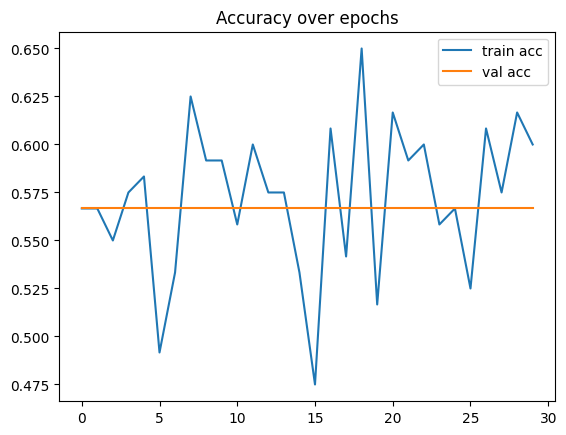

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30



In [191]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()


y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

In [192]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5667 - loss: 2.0299
Test Loss: 2.029865264892578
Test Accuracy: 0.5666666626930237


In [193]:
predictions = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:

speed_data = df['speed'].dropna().values

breaks = jenkspy.jenks_breaks(speed_data, n_classes=3)

def classify_speed(val):
    for i in range(1, len(breaks)):
        if val <= breaks[i]:
            return f'Group {i}'

df['speed_group'] = df['speed'].apply(classify_speed)



In [ ]:


sns.histplot(data=df, x='speed', hue='speed_group', palette='Set2', multiple='stack')
plt.title('Speed Grouping by Jenks Breaks')
plt.show()

## 💾 Save Trained Model

In [ ]:
model.save('my_model.h5')
